# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Bandit-Convex-Optimization-using-Simple-Multi-armed-bandit" data-toc-modified-id="Bandit-Convex-Optimization-using-Simple-Multi-armed-bandit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bandit Convex Optimization using Simple Multi-armed bandit</a></div><div class="lev2 toc-item"><a href="#Run-algorithm-examples" data-toc-modified-id="Run-algorithm-examples-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run algorithm examples</a></div><div class="lev3 toc-item"><a href="#Import-packages" data-toc-modified-id="Import-packages-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Import packages</a></div><div class="lev3 toc-item"><a href="#Define-functions-from-namespace" data-toc-modified-id="Define-functions-from-namespace-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Define functions from namespace</a></div><div class="lev3 toc-item"><a href="#Set-parameters" data-toc-modified-id="Set-parameters-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Set parameters</a></div><div class="lev3 toc-item"><a href="#Return-full-matrix-of-decision-preferences" data-toc-modified-id="Return-full-matrix-of-decision-preferences-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Return full matrix of decision preferences</a></div><div class="lev3 toc-item"><a href="#Return-every-fifth-entry-for-decision-preferences" data-toc-modified-id="Return-every-fifth-entry-for-decision-preferences-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Return every fifth entry for decision preferences</a></div><div class="lev3 toc-item"><a href="#Return-every-fifth-entry-for-each-of-the-values-computed,-x,-ell,-ellHat,-fHat" data-toc-modified-id="Return-every-fifth-entry-for-each-of-the-values-computed,-x,-ell,-ellHat,-fHat-116"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Return every fifth entry for each of the values computed, <code>x</code>, <code>ell</code>, <code>ellHat</code>, <code>fHat</code></a></div><div class="lev2 toc-item"><a href="#Numerical-Results" data-toc-modified-id="Numerical-Results-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Numerical Results</a></div><div class="lev3 toc-item"><a href="#Confirm-we-get-the-shapes,-entries-we-expect" data-toc-modified-id="Confirm-we-get-the-shapes,-entries-we-expect-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Confirm we get the shapes, entries we expect</a></div><div class="lev2 toc-item"><a href="#Plot-results" data-toc-modified-id="Plot-results-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot results</a></div><div class="lev3 toc-item"><a href="#Plotting-loss-and-cost" data-toc-modified-id="Plotting-loss-and-cost-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plotting loss and cost</a></div><div class="lev3 toc-item"><a href="#2D-evolution-of-density" data-toc-modified-id="2D-evolution-of-density-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>2D evolution of density</a></div><div class="lev3 toc-item"><a href="#3D-density" data-toc-modified-id="3D-density-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>3D density</a></div>

# Bandit Convex Optimization using Simple Multi-armed bandit

## Run algorithm examples

### Import packages

In [1]:
%pylab inline
import sys
sys.path.append('/Users/berkas/Dropbox/school/phd/machine-learning/code/ActiveLearning')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import ActiveLearning

### Define functions from namespace

In [4]:
invLoss = ActiveLearning.LossRegret.inverseLoss
ogdStep = ActiveLearning.OnlineGradientDescent.ogdStep
splxProj = ActiveLearning.Projection.ProjSimplex
mab = ActiveLearning.MultiArmedBandit.simpleMAB

### Set parameters

In [5]:
nMax = 10
TMax = 1000

### Return full matrix of decision preferences

In [6]:
xHat_full = mab(n=nMax, T=TMax, delta=.5,
                algOCO=ogdStep, actionLoss=invLoss,
                returnEO=0, actionLossVerbose=False)

### Return every fifth entry for decision preferences

In [7]:
xHat_EO5 = mab(n=nMax, T=TMax, delta=.5,
               algOCO=ogdStep, actionLoss=invLoss,
               returnEO=5,
               actionLossVerbose=False)

### Return every fifth entry for each of the values computed, `x`, `ell`, `ellHat`, `fHat`

In [8]:
dict_EO5 = mab(n=nMax, T=TMax, delta=.5,
               algOCO=ogdStep, actionLoss=invLoss,
               returnEO=5, returnVals = 'all',
               actionLossVerbose=False)

## Numerical Results

### Confirm we get the shapes, entries we expect

In [9]:
xHat_full.shape

(10, 1001)

In [10]:
xHat_EO5.shape

(10, 201)

In [11]:
dict_EO5.keys()

dict_keys(['ell', 'fHat', 'x', 'ellHat'])

In [12]:
dict_EO5['ellHat'].shape

(10, 200)

## Plot results

### Plotting loss and cost

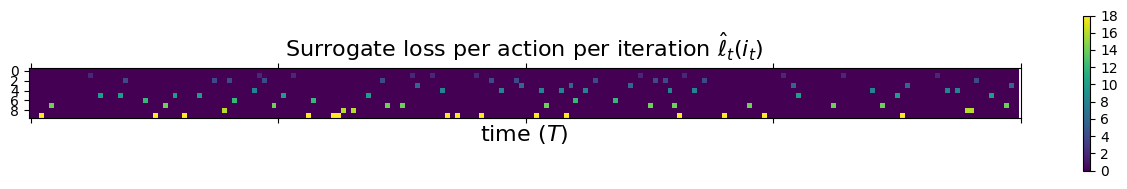

In [13]:
plt.figure(figsize=(12,4));
plt.matshow(dict_EO5['ellHat'])
plt.title('Surrogate loss per action per iteration $\\hat\\ell_t(i_t)$', size=16);
plt.xlabel('time ($T$)',size=16)
xlocs, xlabs = plt.xticks();
plt.xticks(xlocs[1:], ['' for _ in range(len(xlocs)-1)])
plt.colorbar();

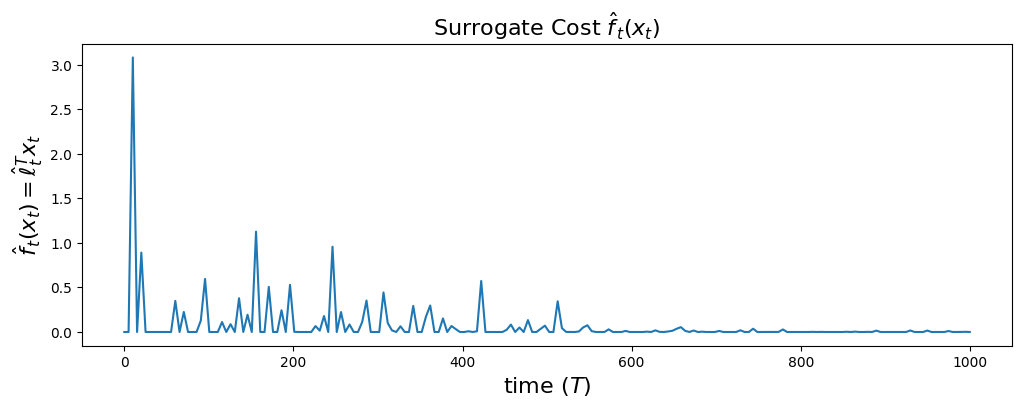

In [14]:
plt.figure(figsize=(12,4))
plt.plot(np.linspace(0, TMax, TMax//5), dict_EO5['fHat']);
plt.title('Surrogate Cost $\\hat f_t(x_t)$', size=16);
plt.xlabel('time ($T$)', size=16);
plt.ylabel('$\\hat f_t(x_t) = \\hat \\ell_t^T x_t$', size=16);

### 2D evolution of density

In [15]:
cmBlues = plt.cm.Blues(np.linspace(0, 1, xHat_full.shape[1]), alpha=.3)

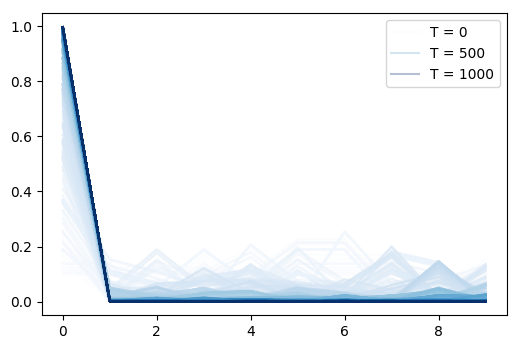

In [16]:
for j in range(xHat_full.shape[1]):
    if j in [0, int(np.floor(xHat_full.shape[1]/2)), xHat_full.shape[1]-1]:
        plt.plot(xHat_full[:, j], color=cmBlues[j], label='T = {}'.format(j))
    else:
        plt.plot(xHat_full[:, j], color=cmBlues[j])
plt.legend();

### 3D density

In [17]:
[nmesh, Tmesh] = np.meshgrid(range(nMax), range(0, TMax+1, 5), indexing='ij')

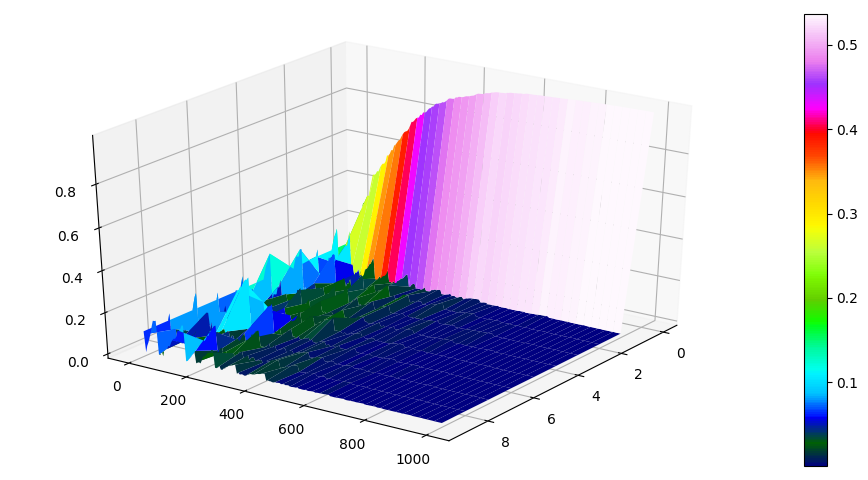

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
img = ax.plot_surface(nmesh, Tmesh, xHat_EO5, cmap=plt.cm.gist_ncar);
plt.colorbar(img);
ax.view_init(azim=35)